In [8]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"D:\python for DS\Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# Data Analysis & Preprocessing

In [10]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [12]:
df.shape

(148670, 34)

## Statistical Analysis 

In [13]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [14]:
print("Number of duplicate rows: ", len(df[df.duplicated()]))


Number of duplicate rows:  0


In [15]:
df.count()

ID                           148670
year                         148670
loan_limit                   145326
Gender                       148670
approv_in_adv                147762
loan_type                    148670
loan_purpose                 148536
Credit_Worthiness            148670
open_credit                  148670
business_or_commercial       148670
loan_amount                  148670
rate_of_interest             112231
Interest_rate_spread         112031
Upfront_charges              109028
term                         148629
Neg_ammortization            148549
interest_only                148670
lump_sum_payment             148670
property_value               133572
construction_type            148670
occupancy_type               148670
Secured_by                   148670
total_units                  148670
income                       139520
credit_type                  148670
Credit_Score                 148670
co-applicant_credit_type     148670
age                         

## Percentatages of missing values for each column

In [16]:
Features_with_NaN=[col for col in df.columns if df[col].isnull().sum()>0]
for column in Features_with_NaN:
    print(column,np.round(df[column].isnull().mean(),2),'% missing values')

loan_limit 0.02 % missing values
approv_in_adv 0.01 % missing values
loan_purpose 0.0 % missing values
rate_of_interest 0.25 % missing values
Interest_rate_spread 0.25 % missing values
Upfront_charges 0.27 % missing values
term 0.0 % missing values
Neg_ammortization 0.0 % missing values
property_value 0.1 % missing values
income 0.06 % missing values
age 0.0 % missing values
submission_of_application 0.0 % missing values
LTV 0.1 % missing values
dtir1 0.16 % missing values


## Checking for numerical & object features

In [17]:
def count_features(data):
    #Getting column with objects dtype
    objects= data.select_dtypes(include=['object']).columns
    numerical=data.select_dtypes(include=['int64']).columns
    floating=data.select_dtypes(include=['float64']).columns
    
    print('Numerical features are :',len(numerical))
    print('Objects features are  :',len(objects))
    print('Floating features are :',len(floating))

In [18]:
count_features(df)

Numerical features are : 5
Objects features are  : 21
Floating features are : 8


## Checking count of eligibility by gender

In [19]:
gender_status=df.groupby(['Gender','Status']).size().reset_index().rename(columns={0:'Total Count'})
gender_status

,Gender,Status,Total Count
0,Female,0,20418
1,Female,1,6848
2,Joint,0,33466
3,Joint,1,7933
4,Male,0,31255
5,Male,1,11091
6,Sex Not Available,0,26892
7,Sex Not Available,1,10767


<Axes: xlabel='Gender', ylabel='Total Count'>

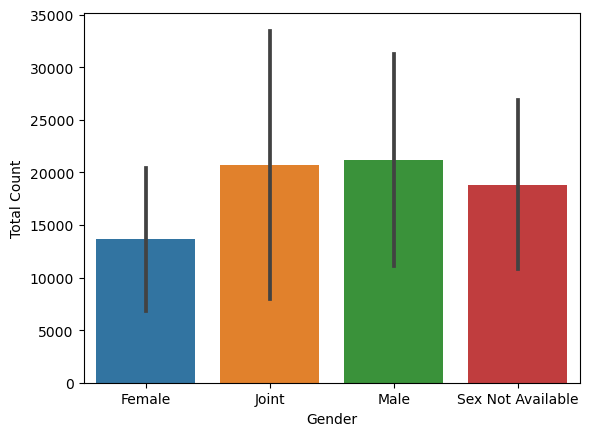

In [20]:
sns.barplot(x='Gender',y='Total Count',data=gender_status)

## Checking unique values in each object feature

In [21]:
df.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

# Checking unique values in each Object feature

In [22]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['object']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(df)

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64 

**************************************************
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64 

**************************************************
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64 

**************************************************
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64 

**************************************************
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64 

**************************************************
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64 

**************************************************
open_credit
nopc    148114
opc        556
Name: count, dtype: int64 

**************************************************
business_or_commercial
nob/c    127908
b/c

# Checking for missing values

In [23]:
missing_features = [features for features in df.columns if df[features].isnull().sum() > 0]
print('Features having missings values are :',missing_features)

Features having missings values are : ['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'property_value', 'income', 'age', 'submission_of_application', 'LTV', 'dtir1']


In [24]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

<Axes: >

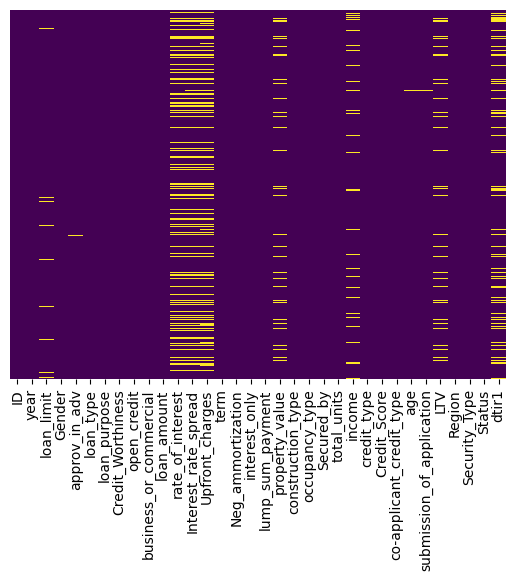

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Pie chart Graphs to check frequency region and loan purpose in a Dataset

([<matplotlib.patches.Wedge at 0x235012760d0>,
 [Text(-0.008995408754127082, 1.099963218758403, 'North'),
  Text(-0.22036708868183472, -1.077700490036955, 'south'),
  Text(1.0695159326560089, -0.2571685629989551, 'central'),
  Text(1.0996254343670884, -0.028703729600740396, 'North-East')],
 [Text(-0.004906586593160226, 0.5999799375045834, '50.26%'),
  Text(-0.12020023019009166, -0.587836630929248, '43.06%'),
  Text(0.5833723269032776, -0.14027376163579366, '5.85%'),
  Text(0.5997956914729572, -0.01565657978222203, '0.83%')])

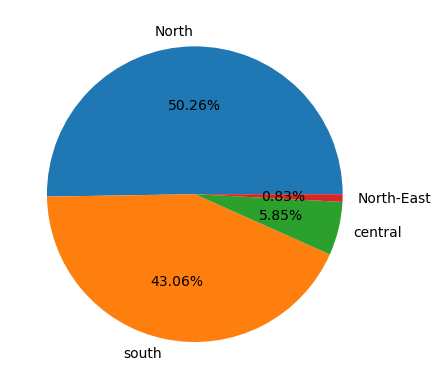

In [26]:
region_names=df.Region.value_counts().index
region_val=df.Region.value_counts().values
plt.pie(region_val,labels=region_names[:],autopct='%1.2f%%')

## Observations:
##### Most people belong to North regions.
##### There are very few people from North-East.
    

([<matplotlib.patches.Wedge at 0x2357d984650>,
 [Text(0.41593847309550813, 1.0183296060701454, 'p3'),
  Text(-1.0201060611602615, -0.41156241809001143, 'p4'),
  Text(0.710322529200467, -0.8399058902700064, 'p1'),
  Text(1.0973637714591258, -0.07611013788585434, 'p2')],
 [Text(0.22687553077936803, 0.5554525124018974, '37.66%'),
  Text(-0.5564214879055971, -0.22448859168546076, '36.89%'),
  Text(0.38744865229116376, -0.4581304856018216, '23.25%'),
  Text(0.598562057159523, -0.04151462066501145, '2.20%')])

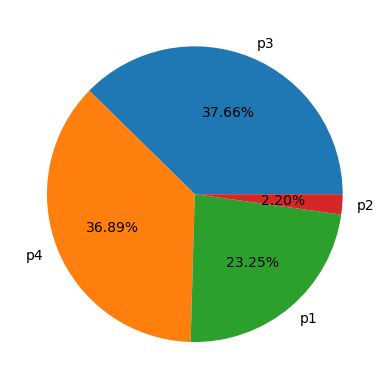

In [27]:
loan_purpose=df.loan_purpose.value_counts().index
val=df.loan_purpose.value_counts().values
plt.pie(val,labels=loan_purpose,autopct='%1.2f%%')

# Feature engineering 

# Checking Relation between Attributes

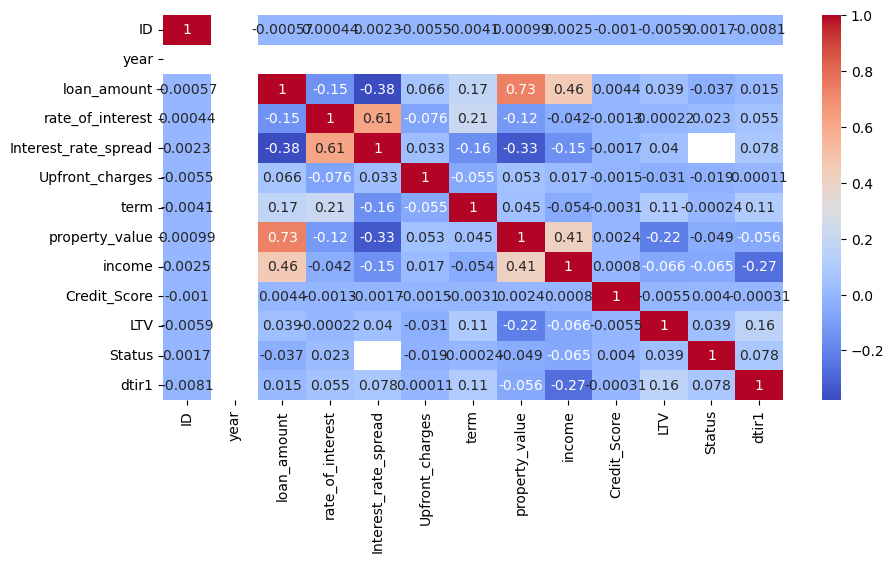

In [28]:
# Get the data types of each column
column_types = df.dtypes

# Select only the numeric columns (assuming 'df' is your DataFrame)
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

## Analysis:
### Following are independent features which are highly correlated, one should be dropped:
#### 1. Relationship between Status and Rate of Interest
#### 2. Loan amount and property type
#### 3. Loan amount and term
#### 4. Rate of interest and interest spread
##### 5. Loan amount and Property value

## Removing Irrelevant columns

In [29]:
df.drop(['ID','year','term','Interest_rate_spread','property_value','submission_of_application'],axis=1,inplace=True)

In [30]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


<Axes: >

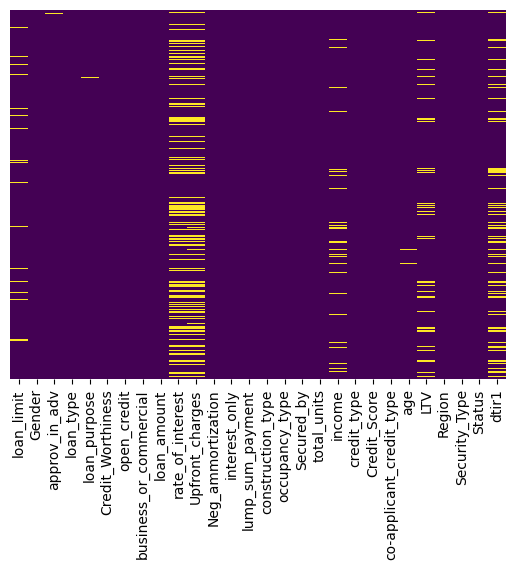

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


In [33]:
df.count()

loan_limit                  145326
Gender                      148670
approv_in_adv               147762
loan_type                   148670
loan_purpose                148536
Credit_Worthiness           148670
open_credit                 148670
business_or_commercial      148670
loan_amount                 148670
rate_of_interest            112231
Upfront_charges             109028
Neg_ammortization           148549
interest_only               148670
lump_sum_payment            148670
construction_type           148670
occupancy_type              148670
Secured_by                  148670
total_units                 148670
income                      139520
credit_type                 148670
Credit_Score                148670
co-applicant_credit_type    148670
age                         148470
LTV                         133572
Region                      148670
Security_Type               148670
Status                      148670
dtir1                       124549
dtype: int64

## Detecting and removing Outliers

In [34]:
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
df = detect_outliers(df)
df


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


In [35]:
df.describe()

,loan_amount,rate_of_interest,Upfront_charges,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,109028.000000,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,3224.996127,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,3251.121510,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,0.000000,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,581.490000,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,2596.450000,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,4812.500000,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,60000.000000,578580.000000,900.000000,7831.250000,1.000000,61.000000


# Inputing mull/NaN values

In [36]:
for i in df.columns:       
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        df[i].fillna(df[i].mean(),inplace=True)

    else:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,4980.0,EQUI,552,EXP,55-64,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.000000


In [38]:
df.isnull().sum() 

loan_limit                  0
Gender                      0
approv_in_adv               0
loan_type                   0
loan_purpose                0
Credit_Worthiness           0
open_credit                 0
business_or_commercial      0
loan_amount                 0
rate_of_interest            0
Upfront_charges             0
Neg_ammortization           0
interest_only               0
lump_sum_payment            0
construction_type           0
occupancy_type              0
Secured_by                  0
total_units                 0
income                      0
credit_type                 0
Credit_Score                0
co-applicant_credit_type    0
age                         0
LTV                         0
Region                      0
Security_Type               0
Status                      0
dtir1                       0
dtype: int64

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>,
        <Axes: title={'center': 'Upfront_charges'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'dtir1'}>, <Axes: >]], dtype=object)

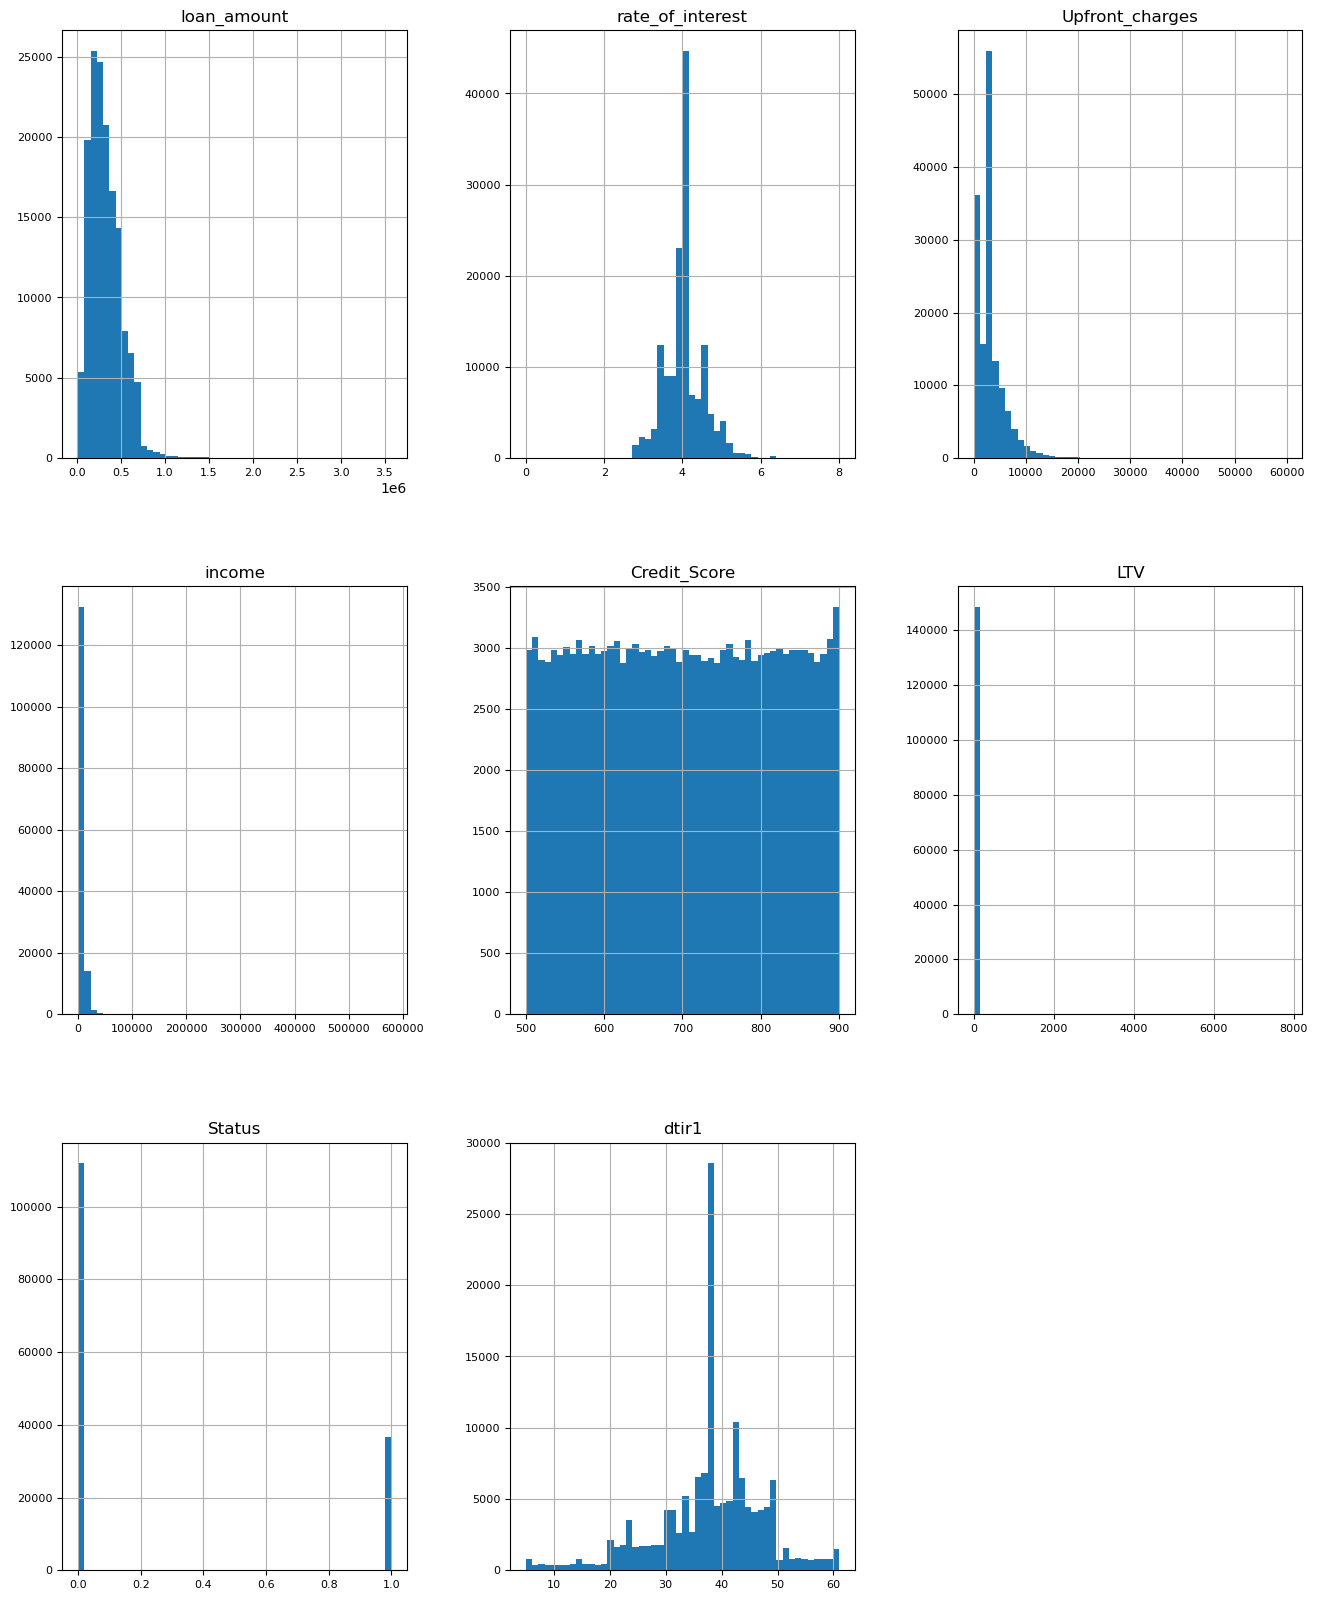

In [39]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [40]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,4980.0,EQUI,552,EXP,55-64,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.000000


In [48]:
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [51]:
df.to_csv('Preprocessed Data')

In [52]:
print(df.columns)
df.info()

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_limit                148670 non-null  object 
 1   Gender                    148670 non-null  object 
 2   approv_in_adv             148670 non-null  object 
 3   loan_type                 148670 non-null  object 
 4   loan_purpose              148670 no

In [53]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Male,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,4980.0,EQUI,552,EXP,55-64,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Male,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.000000
